## Final Project Submission

Please fill out:
* Student name: Daisy Wagati 
* Student pace: Full Time 
* Instructor name: Mwikali 


## Project Overview

This project deals with a company that is seeking to expand to new industries to expand its portfolio by  purchasing and operating airplanes for commercial and private enterprises. Through a comprehensive analysis of aviation accident data from 1962 to 2023, we will conduct an exploratory data analysis to provide insights on the frequency and distribution of uninjured people across different aircrafts. Ultimately, our goal is to provide actionable insights that will guide the company's entry into the aircraft industry, and set it up for long-term success and profitability.

### Import Relevant Libraries to Notebook

In the cell below, we will import the relevant libraries that will enable us to read data from the csv file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load the dataset into a dataframe

In the cell below, we will use pandas to create a new DataFrame called **df** containing the data from the dataset in the file **Aviation_Data.csv** in the folder containing this notebook. We will then check the structure of our data by calling **df.head()** which shows us the preview of our data


In [2]:
#Use pandas to load the csv file
df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Data Understanding

Here, we would like to get familiar with the data by understanding the dimensionality of our dataset and investigating what type of data it contains, and the data types used to store it

We will start by calling **.shape** to get the number of rows and columns in the DataFrame

In [3]:
#Use .shape to get number of rows and columns
df.shape

(90348, 31)

Next we call **.info()** to get a summary of the DataFrame's structure and content

In [4]:
#Use .info() to get summary of DataFrame's structure and content
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

Then we call **.describe()** to get descriptive statistics of our DataFrame which gives us a summary of central tendency, dispersion and shape of a data set's distribution

In [5]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### Data Cleaning

We shall perform data cleaning so as to detect and correct(or remove) corrupt or inaccurate records from the data set, and improve overall quality and readability of the data set. We shall handle missing values, outliers and duplicates, as well as transforming and formatting the data into a consistent and usable format.

We shall start by creating a copy of the original DataFrame before we make any changes to it in case we would like to retrieve original information later.

In [6]:
#Create copy of the DataFrame
df_copy = df.copy

### Drop unnecessary rows

We shall then look for and drop duplicates so as to get rid of unnecessary rows

In [7]:
#Identify duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
90343    False
90344    False
90345    False
90346    False
90347    False
Length: 90348, dtype: bool

In [8]:
#Check sum of duplicates
df.duplicated().sum()

1390

In [9]:
#Drop duplicates
df.drop_duplicates(inplace = True, keep = 'first')

In [10]:
#Confirm that duplicates have been dropped by calling **.shape**
df.shape

(88958, 31)

As can be seen above duplicates have been dropped, reducing the number of rows from 90348 to 88958

### Drop unnecessary Columns
We have columns that are unnecessary to our project and we need to drop them.

In [11]:
#Drop unnecessary columns
df.drop(columns=['Event.Id', 'Accident.Number', 'Location', 'Latitude','Longitude','Airport.Code', 'FAR.Description', 'Schedule'], inplace = True)

In [12]:
#Confirm that unnecessary columns have been dropped
df.shape

(88958, 23)

As can be seen above, unnecessary columns have been dropped reducing number of columns from 31 to 23. Now we can work with the narrowed down data.

In [13]:
#Check for missing values
df.isna()

,Investigation.Type,Event.Date,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,False,False,False,True,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,True,False,False,False,...,False,True,False,True,True,True,False,False,False,False
3,False,False,False,True,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,False,False,False,True,False,True,True,False,False,False,...,False,True,False,False,False,False,True,True,True,False
90344,False,False,False,True,True,True,True,False,False,False,...,True,True,False,False,False,False,True,True,True,True
90345,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
90346,False,False,False,True,True,True,True,False,False,False,...,False,False,False,False,False,False,True,True,True,True


In [14]:
#Check sum of missing values 
df.isna().sum()

Investigation.Type            0
Event.Date                   69
Country                     295
Airport.Name              36168
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Registration.Number        1386
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7146
Purpose.of.flight          6261
Air.carrier               72310
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6450
Publication.Date          15299
dtype: int64

In [15]:
#Replace missing numeric values with median
df.fillna(df.median(), inplace = True)
df.head()

,Investigation.Type,Event.Date,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,Accident,1948-10-24,United States,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,Accident,1962-07-19,United States,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,Accident,1974-08-30,United States,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,...,Personal,NaN,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause,26-02-2007
3,Accident,1977-06-19,United States,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,Accident,1979-08-02,United States,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,...,Personal,NaN,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980


In [16]:
df.tail()

,Investigation.Type,Event.Date,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90343,Accident,2022-12-26,United States,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,Accident,2022-12-26,United States,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,Accident,2022-12-26,United States,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,Accident,2022-12-26,United States,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,Accident,2022-12-29,United States,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [17]:
#Replacing NaN Categorical Values with a Placeholder
df.fillna('Uknown', inplace = True)
df.head()


,Investigation.Type,Event.Date,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,Accident,1948-10-24,United States,Uknown,Fatal(2),Destroyed,Uknown,NC6404,Stinson,108-3,...,Personal,Uknown,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,Uknown
1,Accident,1962-07-19,United States,Uknown,Fatal(4),Destroyed,Uknown,N5069P,Piper,PA24-180,...,Personal,Uknown,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,Accident,1974-08-30,United States,Uknown,Fatal(3),Destroyed,Uknown,N5142R,Cessna,172M,...,Personal,Uknown,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause,26-02-2007
3,Accident,1977-06-19,United States,Uknown,Fatal(2),Destroyed,Uknown,N1168J,Rockwell,112,...,Personal,Uknown,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,Accident,1979-08-02,United States,Uknown,Fatal(1),Destroyed,Uknown,N15NY,Cessna,501,...,Personal,Uknown,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980


In [18]:
#Check for unique values in the dataset
df['Aircraft.Category'].unique()

array(['Uknown', 'Airplane', 'Helicopter', 'Glider', 'Balloon',
       'Gyrocraft', 'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift',
       'Weight-Shift', 'Powered Parachute', 'Rocket', 'WSFT', 'UNK',
       'ULTR'], dtype=object)

In [19]:
#Check for how many times each unique value is present
df['Aircraft.Category'].value_counts()

Uknown               56671
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
ULTR                     1
Rocket                   1
Name: Aircraft.Category, dtype: int64

In [20]:
#Confirm that there are no missing values and that our data is clean
df.isna().sum()

Investigation.Type        0
Event.Date                0
Country                   0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

In [21]:
#To read information in an excel file
df = df.applymap(lambda x: x.encode('unicode_escape').
decode('utf-8') if isinstance(x, str) else x)
df.to_excel('Aviation_analysis.xlsx', index=False, encoding='utf-8')

### Exploratory Data Analysis

Here, we shall seek to uncover patterns, trends, and correlations within the data set. As we've already done data cleaning above, we will move to visualizations by making use of the **.groupby()** method and summarization to understand the characteristics of the data.

 We will also seek to answer the following questions, which will help with our visualization:
**Which aircraft make has the highest number of uninjured people on average?
Is there a correlation between the type of aircraft model and the number of uninjured people?
Is there a correlation between the type of engine (e.g., turbuprop, turbofan, jet) and the number of uninjured people?
Which air carriers have the highest number of uninjured people on average?
Is there a correlation between the severity of injuries and the extent of aircraft damage?
Is there a correlation between amateur-built aircraft and the extent of aircraft damage?**

### Check number of Uninjured People as per make

In [22]:
#Check which Airplane has most number of uninjured people as per make
total_uninjured_by_make = df[df['Aircraft.Category']== 'Airplane'].groupby('Make')['Total.Uninjured'].sum()
total_uninjured_by_make = total_uninjured_by_make.sort_values(ascending = False) [:20]
total_uninjured_by_make

Make
BOEING               68632.0
Boeing               22110.0
AIRBUS               16079.0
CESSNA                6156.0
Mcdonnell Douglas     5557.0
Cessna                4851.0
EMBRAER               3831.0
MCDONNELL DOUGLAS     3236.0
Airbus                3214.0
PIPER                 2981.0
Airbus Industrie      2673.0
Piper                 2650.0
AIRBUS INDUSTRIE      2591.0
BOMBARDIER INC        2409.0
Lockheed              1708.0
Douglas               1370.0
BEECH                 1222.0
BOMBARDIER            1074.0
Beech                 1058.0
Embraer                972.0
Name: Total.Uninjured, dtype: float64

In [23]:
x=total_uninjured_by_make.index

In [24]:
y=total_uninjured_by_make.values

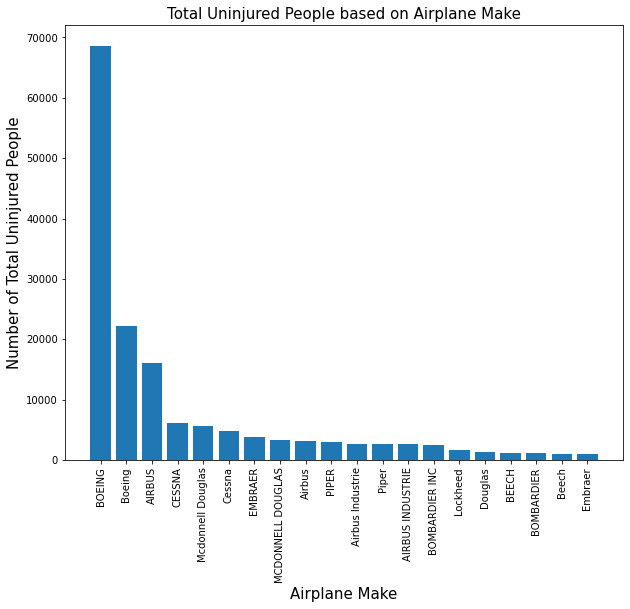

In [25]:
fig, ax=plt.subplots(figsize=(10, 8))
ax.bar(x, y)
plt.xticks(rotation=90)
plt.xlabel('Airplane Make', fontsize=15)
plt.ylabel('Number of Total Uninjured People', fontsize=15)
plt.title('Total Uninjured People based on Airplane Make', fontsize=15);

As can be seen from the graph above, Boeing has the most number of uninjured people

### Relationship between uninjured people and Model Type

In [26]:
#Check which airplane has most uninjured people compared to model 
total_uninjured_by_model = df[df['Aircraft.Category']== 'Airplane'].groupby('Model')['Total.Uninjured'].sum()
total_uninjured_by_model = total_uninjured_by_model.sort_values(ascending = False) [:20]
total_uninjured_by_model

Model
737         20529.0
777          8525.0
767          5522.0
A320         3360.0
757          3135.0
A330         2993.0
747          2930.0
787          2357.0
747-400      2288.0
777-222      1708.0
737 7H4      1704.0
DC-10-30     1635.0
737-7H4      1587.0
A320-232     1521.0
A330-323     1395.0
A321         1349.0
737-800      1235.0
B777         1135.0
A380         1097.0
737-300      1056.0
Name: Total.Uninjured, dtype: float64

In [27]:
x=total_uninjured_by_model.index

In [28]:
y=total_uninjured_by_model.values

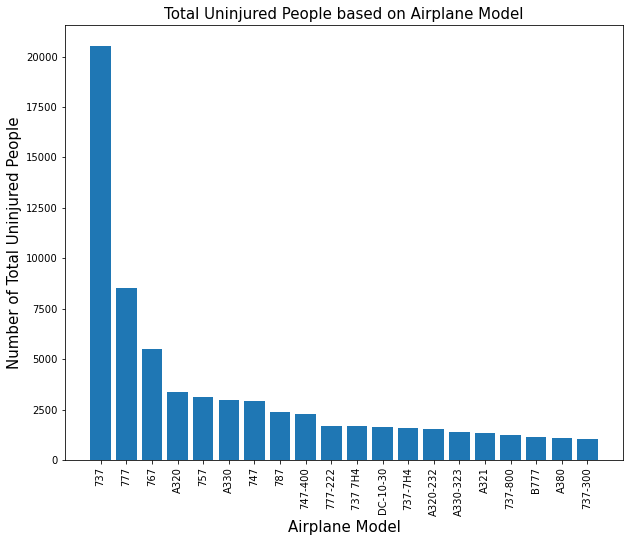

In [29]:
fig, ax=plt.subplots(figsize=(10, 8))
ax.bar(x, y)
plt.xticks(rotation=90)
plt.xlabel('Airplane Model', fontsize=15)
plt.ylabel('Number of Total Uninjured People', fontsize=15)
plt.title('Total Uninjured People based on Airplane Model', fontsize=15);

In the graph, Model 737 has highest number of uninjured people followed by 777. This suggeests that these models have a better safety record as compared to other models.

### Relationship between uninjured people and Engine Type

In [30]:
#Check number of uninjured people compared to Engine Type
total_uninjured_by_engine_type = df[df['Aircraft.Category']== 'Airplane'].groupby('Engine.Type')['Total.Uninjured'].sum()
total_uninjured_by_engine_type = total_uninjured_by_engine_type.sort_values(ascending = False) [:20]
total_uninjured_by_engine_type

Engine.Type
Turbo Fan          70813.0
Uknown             62727.0
Reciprocating      23004.0
Turbo Jet           6446.0
Turbo Prop          4072.0
Unknown             3804.0
Geared Turbofan      121.0
Turbo Shaft           22.0
Electric               2.0
UNK                    0.0
Name: Total.Uninjured, dtype: float64

In [31]:
x=total_uninjured_by_engine_type.index

In [32]:
y=total_uninjured_by_engine_type.values

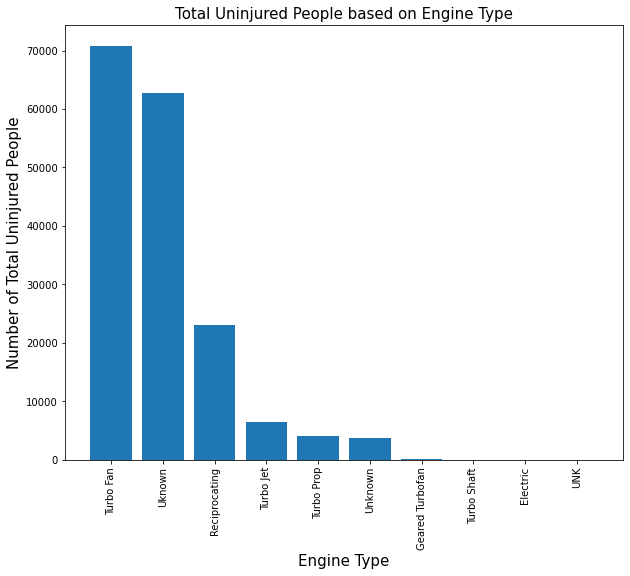

In [33]:
fig, ax=plt.subplots(figsize=(10, 8))
ax.bar(x, y)
plt.xticks(rotation=90)
plt.xlabel('Engine Type', fontsize=15)
plt.ylabel('Number of Total Uninjured People', fontsize=15)
plt.title('Total Uninjured People based on Engine Type', fontsize=15);

As can be seen above, Turbo Fan has most number of uninjured people suggesting that it has highest safety record as compared to the rest.

### Relationship between number of uninjured people and air carrier

In [34]:
#Check number of uninjured people based on air carrier
total_uninjured_by_air_carrier = df[df['Aircraft.Category']== 'Airplane'].groupby('Air.carrier')['Total.Uninjured'].sum()
total_uninjured_by_air_carrier = total_uninjured_by_air_carrier.sort_values(ascending = False) [:20]
total_uninjured_by_air_carrier

Air.carrier
Uknown                    49996.0
Delta Air Lines            6578.0
American Airlines          5353.0
United Airlines            5189.0
SOUTHWEST AIRLINES CO      4637.0
DELTA AIR LINES INC        3984.0
AMERICAN AIRLINES INC      3600.0
UNITED AIR LINES INC       2933.0
Southwest Airlines         2257.0
US AIRWAYS INC             1743.0
Air France                 1374.0
Air Canada                 1073.0
Ryanair                     937.0
UNITED AIRLINES INC         931.0
NORTHWEST AIRLINES INC      928.0
Delta Air Lines, Inc.       890.0
Delta Air Lines Inc         825.0
Omni Air International      795.0
DELTA AIRLINES INC          702.0
American Airlines Inc       686.0
Name: Total.Uninjured, dtype: float64

In [35]:
x=total_uninjured_by_air_carrier.index

In [36]:
y=total_uninjured_by_air_carrier.values

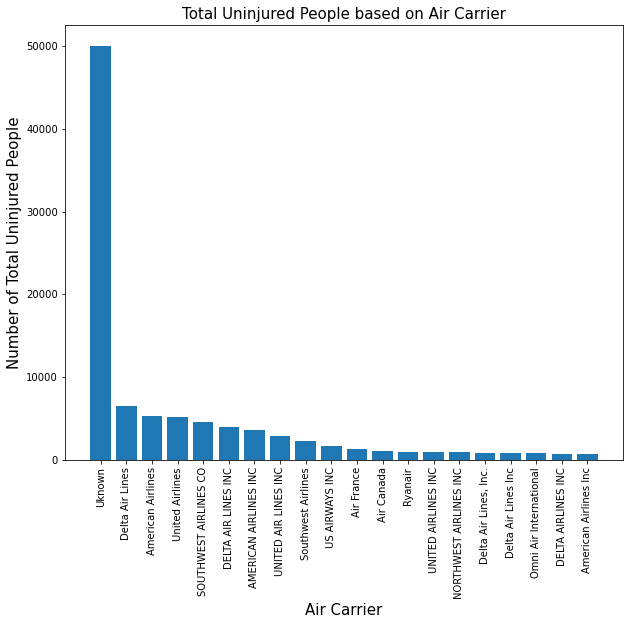

In [37]:
fig, ax=plt.subplots(figsize=(10, 8))
ax.bar(x, y)
plt.xticks(rotation=90)
plt.xlabel('Air Carrier', fontsize=15)
plt.ylabel('Number of Total Uninjured People', fontsize=15)
plt.title('Total Uninjured People based on Air Carrier', fontsize=15);

We assigned a placeholder 'Unknown' to missing values. However, it can be seen that Delta Airlines have most number of people who were uninjured, closely followed by American Airlines

### Relationship between Injury Severity and Aircraft damage

In [38]:
#Check likelihood of injury severity based on aircraft damage
total_injury_severity = df[df['Aircraft.Category']== 'Airplane'].groupby('Aircraft.damage')['Injury.Severity'].count()
total_injury_severity = total_injury_severity.sort_values(ascending = False) [:20]
total_injury_severity

Aircraft.damage
Substantial    21719
Destroyed       3552
Uknown          1282
Minor            964
Unknown          100
Name: Injury.Severity, dtype: int64

In [39]:
x=total_injury_severity.index

In [40]:
y=total_injury_severity.values

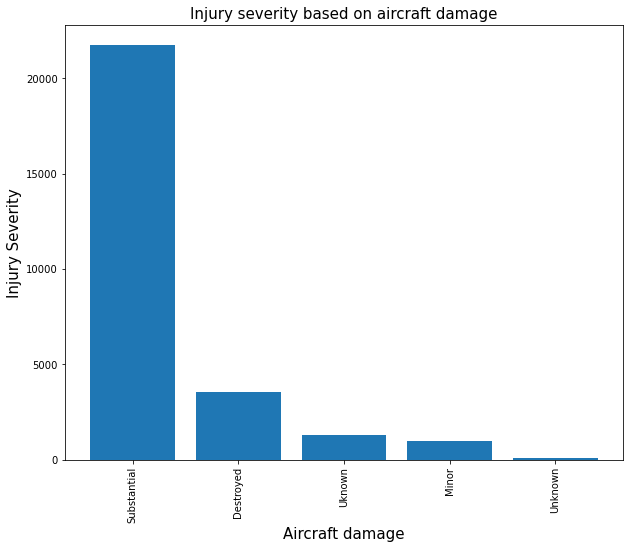

In [41]:
fig, ax=plt.subplots(figsize=(10, 8))
ax.bar(x, y)
plt.xticks(rotation=90)
plt.xlabel('Aircraft damage', fontsize=15)
plt.ylabel('Injury Severity', fontsize=15)
plt.title('Injury severity based on aircraft damage', fontsize=15);

In the graph, substantial Aircraft damage suggested a higher likelihood of severe injuries.

### Relationship between Amateur Built and Aircraft damage

In [42]:
#Check if amateur built affects aircraft damage
amateur_built = df[df['Aircraft.Category']== 'Airplane'].groupby('Amateur.Built')['Aircraft.damage'].count()
amateur_built

Amateur.Built
No        24417
Uknown       17
Yes        3183
Name: Aircraft.damage, dtype: int64

In [43]:
x=amateur_built.index

In [44]:
y=amateur_built.values

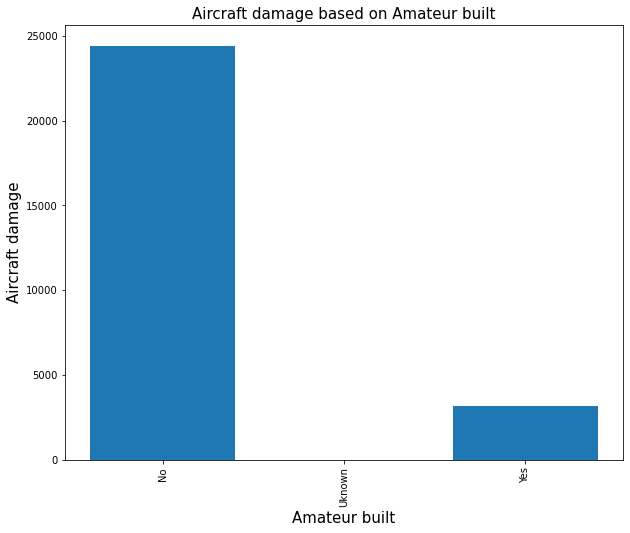

In [45]:
fig, ax=plt.subplots(figsize=(10, 8))
ax.bar(x, y)
plt.xticks(rotation=90)
plt.xlabel('Amateur built', fontsize=15)
plt.ylabel('Aircraft damage', fontsize=15)
plt.title('Aircraft damage based on Amateur built', fontsize=15);

Amateur built did not have much effect on aircraft damage.

In this notebook, we were able to import relevant libraries, perform data cleaning on our data, and do EDA so as to assess which aircraft is lowest risk for the company to start this new business endeavour.